Dataset composto por sete especies de peixe os quais foram medidos peso, altura, largura e comprimento. A partir disso podemos utilizar modelos de machine learning para prever os dados utilizando regressão linear.

Significados das colunas:

- Species: Nome da espécie do peixe
- Weight: Peso do peixe em gramas
- Length1: Comprimento vertical do peixe em centímetros
- Length2: Comprimento diagonal do peixe em centímetros
- Length3: Comprimento cruzado do peixe em centímetros
- Height: Altura do peixe em centímetros
- Width: Largura diagonal em centímentros

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [3]:
from google.colab import files
upload = files.upload()

Saving fish.csv to fish.csv


In [20]:
df = pd.read_csv('fish.csv', sep=",")

In [21]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,04.02
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.73,4.4555
4,Bream,430.0,26.5,29.0,34.0,"12,444","5,134"


In [22]:
df.shape

(159, 7)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    object 
 6   Width    159 non-null    object 
dtypes: float64(4), object(3)
memory usage: 8.8+ KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0,120.00,273.0,650.00,1650.0
Length1,159.0,26.247170,9.996441,7.5,19.05,25.2,32.70,59.0
Length2,159.0,28.415723,10.716328,8.4,21.00,27.3,35.50,63.4
Length3,159.0,31.227044,11.610246,8.8,23.15,29.4,39.65,68.0


In [25]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [29]:
df.columns


Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

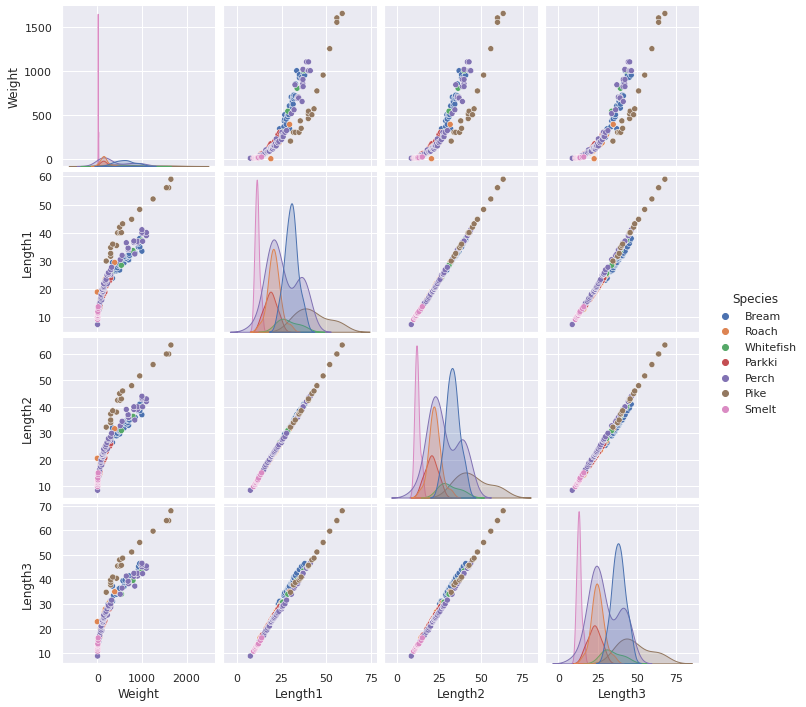

In [47]:
# Como os dados se relacionam?
sns.pairplot(df, kind='scatter', hue='Species')

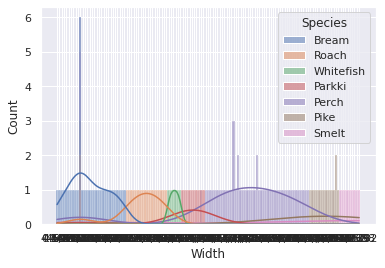

In [31]:
sns.histplot(data=df, x='Width', hue='Species', kde=True)


In [45]:
# Contagens das diferentes espécies
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


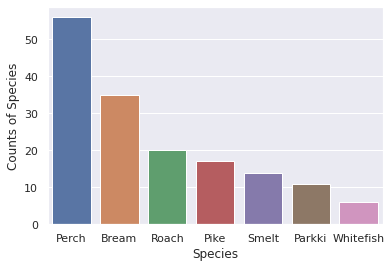

In [46]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

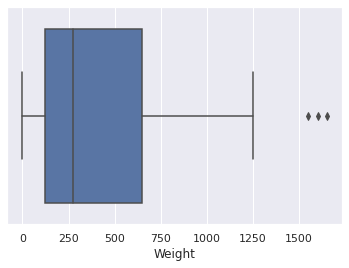

In [48]:
# Analisando outliers

sns.boxplot(x=df['Weight']);

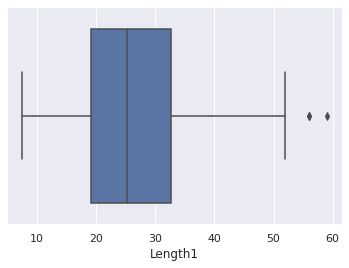

In [53]:
sns.boxplot(x=df['Length1']);


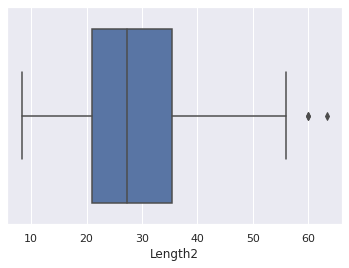

In [54]:
sns.boxplot(x=df['Length2']);


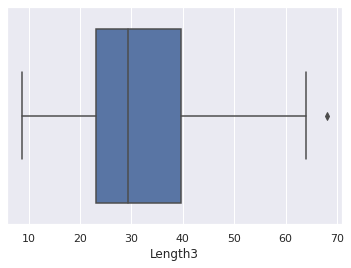

In [55]:
sns.boxplot(x=df['Length3']);

In [28]:
# Matriz de correlação
df.corr()

,Weight,Length1,Length2,Length3
Weight,1.000000,0.915712,0.918618,0.923044
Length1,0.915712,1.000000,0.999517,0.992031
Length2,0.918618,0.999517,1.000000,0.994103
Length3,0.923044,0.992031,0.994103,1.000000


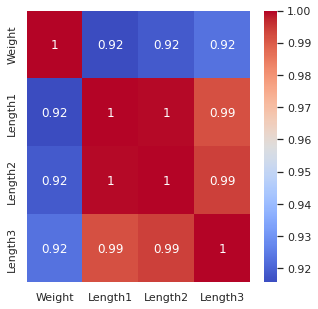

In [36]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [62]:
# Preparando modelo para calcular os coefientes da Regressão Linear e predizer outros valores de X, utilizando o modelo treinado.

y = df['Weight'] # Variável resposta
X = df.drop(['Weight', 'Species','Length1','Length2','Length3'], axis=1) # Variáveis explicativas

In [63]:
X.head()

,Height,Width
0,11.52,04.02
1,12.48,4.3056
2,12.3778,4.6961
3,12.73,4.4555
4,"12,444","5,134"


In [66]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [69]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42) 

In [70]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (127, 2)
X_test dimension=  (32, 2)
y_train dimension=  (127,)
y_train dimension=  (32,)


In [71]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

ValueError: ignored

In [72]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [73]:
print('coef= ', model.coef_) # Since we have two features(Height and Width), there will be 2 coef
print('intercept= ', model.intercept_)
print('score= ', model.score(X_test,y_test))

AttributeError: ignored